#### Decision Trees
Generate a set of rules for regression or classification in the form of a set of decision rules that can be written down in a flowchart-like manner.

The learning phase of a decision tree algorithm is a recursive process. Within each recursion, it looks at the training data provided for the particular stage and tries to find the best possible split.

If there's enough data with enough variation of target classes that can be split leading to a cleaner division of the target label in the next stage, we proceed with the split. Otherwise we consider it a leaf node and assign the label of the majority class in the given dataset.

#### Picking the Splitting Attribute
Severl splitting criterions: one interesting one is to use entropy, which measures the amount of randomness or uncertainty in the data. We are aiming to find a splitting criterion that can help up lower the entropy after splitting. Calculated as $$\sum_{i=1}^c -p_i \log(p_i)$$ c the number of possible class labels in the dataset. If a sample is uniform, entropy is 0, if it is evenly divided among all the classes, it has an entropy of 1.

The attribute we select should lead to the best possible reduction of entropy. This is captured by the quantity called information gain, which measures how much measure a feature gives us about the class.

For data attributes that contain continuous data, we can use Gini index crtieria. It is another measure of impurity - the higher the value of Gini, the higher the homogenity. $$Gini = 1 - \sum_{i=1}^c p(i|t)^2$$

In SKLearn, we can select splitting criteria using the criterion hyperparameter.


In [26]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris['data'], columns = iris['feature_names'])
iris_data['target'] = iris['target']
iris_data['target'] = iris_data['target'].apply(lambda x: iris['target_names'][x])
iris_data.shape

(150, 5)

In [27]:
X = iris_data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = iris_data['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)


1.0


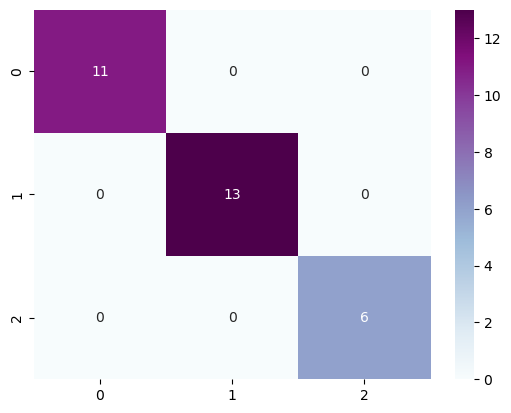

In [32]:
from sklearn.tree import DecisionTreeClassifier
DT_model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth=10)
DT_model_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth =10)

DT_model_gini.fit(X_train, y_train)

y_pred = DT_model_gini.predict(X_test)

import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, y_pred))

from sklearn.model_selection import cross_val_score
cross_val_score(DT_model_gini, X_train, y_train, cv=3, scoring="accuracy")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='BuPu', annot=True)
plt.show()

#### Pruning the trees
Decision trees can be made more efficient using pruning, i.e. removing the branches classifying features of low importance. E.g. we can assign predefined hyperparameters to perform pruning by limiting the depth of decision tree, stating the number of minimum samples that must be present to split an internal node, and minimum samples each leaf should contain.

#### Interpreting Decision Trees
If you can view how the decision conditions are arranged and how the final label is assigned, you can easily understnad the underlying pattern of the data and the model that has been genesklearn.tree import export_graphviz
import pydotplusrated. SKLearn provides an option to export a decision tree in DOT format, we use that in conjuction with the PyDotPlus library that will allow us to create the graph from DOT data. To view the trees directly in Jupyter notebook, we will also need Graphviz.

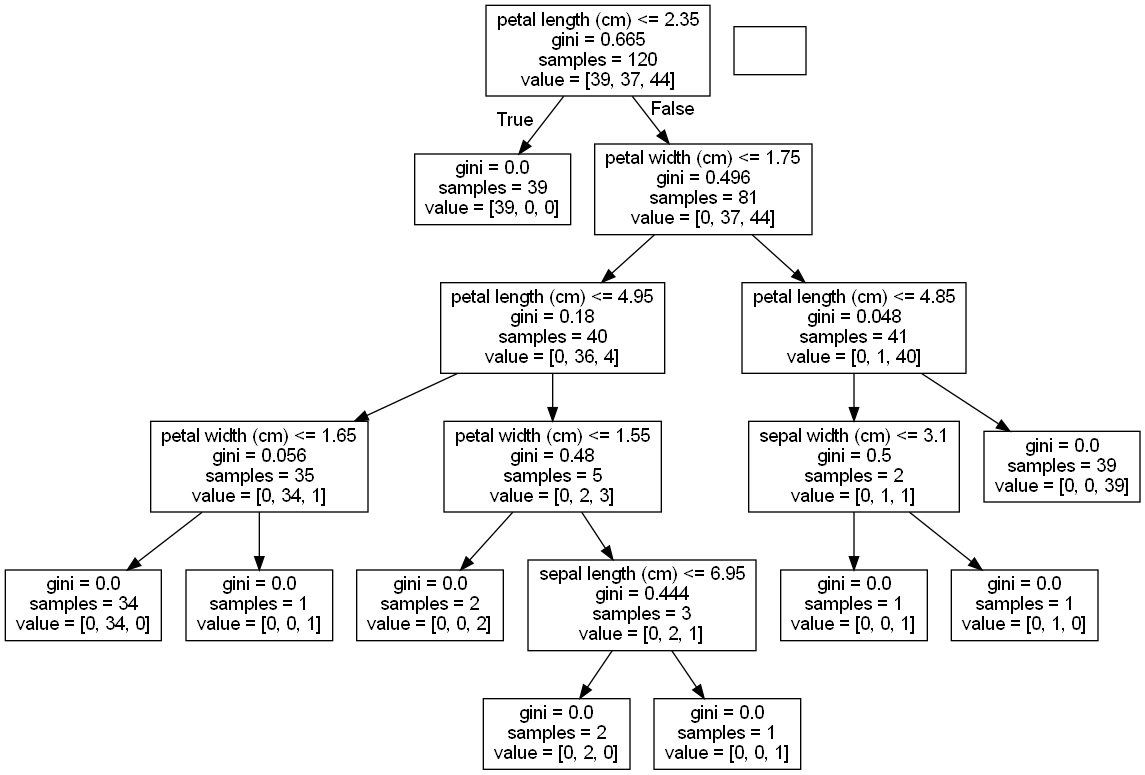

In [46]:
selected_cols = list(X.columns)

import IPython
import IPython.display
from nbconvert import export
from sklearn.tree import export_graphviz
import pydotplus
dot_data = export_graphviz(DT_model_gini, feature_names = selected_cols)
graph = pydotplus.graph_from_dot_data(dot_data)
img = IPython.display.Image(graph.create_png())

IPython.display.display(img)